In [8]:
import pandas as pd
import numpy as np

In [9]:
# fazendo a leitura da base enriquecida, trabalhada na etapa anterior
df = pd.read_csv("base_enriquecida_codigos")

In [10]:
df

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725
2,2019-12,39263000,10,23,SP,1,817800,3951,3951,88311,4.108924,4.154725
3,2019-12,38249929,10,493,SP,1,817800,19540,19540,65812,4.108924,4.154725
4,2019-12,34021300,10,493,BA,1,517800,34400,34400,119356,4.108924,4.154725
...,...,...,...,...,...,...,...,...,...,...,...,...
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713
1764429,2019-08,30043918,10,767,SP,4,817600,225,225,1216801,4.019382,3.778713
1764430,2019-08,90189099,11,87,SP,1,817800,5033,178,22889,4.019382,3.778713
1764431,2019-08,84123900,11,764,PA,4,817600,1,83,7641,4.019382,3.778713


###### Checando capítulos NCM recorrentes

Por meio do Jupyer Notebook "03_análises_diversas_e_representações_gráficas - PARTE 01", constata-se que a maior quantidade de mercadoria importada classifica-se no capítulo 85. De todo modo, para fins de implementação do modelo, entende-se que é desejável não apenas um código que tenha sido importado em quantidade, mas, sobretudo, que tenha sido recorrente. Segue, portanto, consulta ao capítulo da NCM em que os códigos NCM foram mais recorrentes.

In [11]:
# testa capítulos mais recorrentes
df["CAPÍTULO_NCM"] = df["CO_NCM"].astype(str).str[:2]

In [12]:
df["CAPÍTULO_NCM"].value_counts()

84    366185
85    347989
90    121571
39    104402
73     92280
       ...  
78       323
97       289
36       201
43       152
14       114
Name: CAPÍTULO_NCM, Length: 87, dtype: int64

In [13]:
# já tendo sido realizada (em outro Jupyter Notebook) análise para o capítulo 84, tentaremos reproduzir o modelo no âmbito do capítulo 85, que é o segundo mais recorrente
df1=df[df["CAPÍTULO_NCM"]=="85"]

In [14]:
df1["CO_UNID"].value_counts()

11    278968
10     69021
Name: CO_UNID, dtype: int64

In [15]:
df1.drop(columns="CAPÍTULO_NCM", inplace=True)

D:\ANACONDA\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725
5,2019-12,85389090,10,386,SC,1,817800,101,101,879,4.108924,4.154725
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,4.108924,4.154725
7,2019-12,85030010,10,386,SP,4,817600,835,835,3567,4.108924,4.154725
...,...,...,...,...,...,...,...,...,...,...,...,...
1764407,2019-08,85011019,11,355,SP,1,817800,130,33,8565,4.019382,3.778713
1764418,2019-08,85369010,11,776,MG,1,817800,10000,86,2803,4.019382,3.778713
1764422,2019-08,85389020,11,386,SP,4,817700,100,6,1832,4.019382,3.778713
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713


In [17]:
# checando quais os códigos NCM mais recorrentes
g1=df1.groupby(['CO_NCM']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_NCM,contagem
459,85365090,8873
470,85369090,7697
611,85444200,7518
481,85389090,5046
603,85437099,4309
...,...,...
290,85211089,1
291,85211090,1
503,85404000,1
328,85255024,1


In [18]:
g1["% CO_NCM"] = g1["contagem"]/(g1["contagem"].sum())

In [19]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [20]:
g2["% CO_NCM ACUMUL"]=g2["% CO_NCM"].cumsum()

In [21]:
g2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 459 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CO_NCM           637 non-null    int64  
 1   contagem         637 non-null    int64  
 2   % CO_NCM         637 non-null    float64
 3   % CO_NCM ACUMUL  637 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 24.9 KB


In [22]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_NCM, a ideia é reduzir o número de categorias)
g3=g2[g2["% CO_NCM ACUMUL"]<=0.95]
g3
# repare que 95% das ocorrências se restingem a 338 códigos NCM dentre os 637.

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
459,85365090,8873,0.025498,0.025498
470,85369090,7697,0.022119,0.047616
611,85444200,7518,0.021604,0.069221
481,85389090,5046,0.014500,0.083721
603,85437099,4309,0.012383,0.096104
...,...,...,...,...
127,85103000,172,0.000494,0.947858
244,85176251,172,0.000494,0.948352
219,85176130,170,0.000489,0.948840
139,85115090,170,0.000489,0.949329


In [23]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% CO_NCM ACUMUL"]>0.95]
g4

,CO_NCM,contagem,% CO_NCM,% CO_NCM ACUMUL
321,85235990,168,0.000483,0.950294
452,85363010,167,0.000480,0.950774
492,85394110,167,0.000480,0.951254
242,85176248,167,0.000480,0.951734
405,85323090,166,0.000477,0.952211
...,...,...,...,...
290,85211089,1,0.000003,0.999989
291,85211090,1,0.000003,0.999991
503,85404000,1,0.000003,0.999994
328,85255024,1,0.000003,0.999997


In [24]:
# obtendo os 5% códigos NCM menos recorrentes, para agrupar como "outros" no df1 original
idx=g4["CO_NCM"]

In [25]:
mask=df1['CO_NCM'].isin(idx)
mask

0          False
1          False
5          False
6           True
7          False
           ...  
1764407    False
1764418    False
1764422    False
1764428    False
1764432    False
Name: CO_NCM, Length: 347989, dtype: bool

In [26]:
df1["CO_NCM_final"]=df1["CO_NCM"]

<ipython-input-26-e6965bd59fa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_NCM_final"]=df1["CO_NCM"]


In [27]:
# substituir os 5% NCM menos recorrentes pelo código 99999999 (alterou-se a coluna auxiliar CO_NCM_final para preservar a original CO_NCM)
df1.loc[mask, "CO_NCM_final"] = 99999999

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [28]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725,85044021
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725,85183000
5,2019-12,85389090,10,386,SC,1,817800,101,101,879,4.108924,4.154725,85389090
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,4.108924,4.154725,99999999
7,2019-12,85030010,10,386,SP,4,817600,835,835,3567,4.108924,4.154725,85030010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764407,2019-08,85011019,11,355,SP,1,817800,130,33,8565,4.019382,3.778713,85011019
1764418,2019-08,85369010,11,776,MG,1,817800,10000,86,2803,4.019382,3.778713,85369010
1764422,2019-08,85389020,11,386,SP,4,817700,100,6,1832,4.019382,3.778713,85389020
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713,85365090


In [29]:
df1["CO_NCM_final"].value_counts()

99999999    17465
85365090     8873
85369090     7697
85444200     7518
85389090     5046
            ...  
85176251      172
85103000      172
85176130      170
85115090      170
85171810      168
Name: CO_NCM_final, Length: 339, dtype: int64

###### Checando códigos UNID MED EST (CO_UNID) recorrentes

In [30]:
g1=df1.groupby(['CO_UNID']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_UNID,contagem
1,11,278968
0,10,69021


In [31]:
df1["CO_UNID_final"]=df1["CO_UNID"]

<ipython-input-31-043d6a9cfec0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_UNID_final"]=df1["CO_UNID"]


In [32]:
# no caso corrente não há CO_UNID minoritários para serem agrupados em categorial residual. Portanto, não se executará o código a seguir.
#mask=df1['CO_UNID']!=11
#mask

In [33]:
#df1.loc[mask, "CO_UNID_final"] = 99

In [34]:
df1["CO_UNID_final"].value_counts()

11    278968
10     69021
Name: CO_UNID_final, dtype: int64

###### Checando países (CO_PAIS) recorrentes

In [35]:
g1=df1.groupby(['CO_PAIS']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_PAIS,contagem
34,160,74854
54,249,36854
3,23,24452
84,399,17338
35,161,16953
...,...,...
151,760,1
138,698,1
37,165,1
147,744,1


In [36]:
g1["% CO_PAIS"] = g1["contagem"]/(g1["contagem"].sum())

In [37]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [38]:
g2["% CO_PAIS ACUMUL"]=g2["% CO_PAIS"].cumsum()

In [39]:
g2.head()

,CO_PAIS,contagem,% CO_PAIS,% CO_PAIS ACUMUL
34,160,74854,0.215105,0.215105
54,249,36854,0.105906,0.321010
3,23,24452,0.070267,0.391277
84,399,17338,0.049823,0.441100
35,161,16953,0.048717,0.489817


In [40]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_PAIS, a ideia é reduzir o número de categorias)
g3=g2[g2["% CO_PAIS ACUMUL"]<=0.95]
g3.info()
# repare que 95% das ocorrências se restingem a 35 países dentre os 172.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 34 to 162
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CO_PAIS           35 non-null     int64  
 1   contagem          35 non-null     int64  
 2   % CO_PAIS         35 non-null     float64
 3   % CO_PAIS ACUMUL  35 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.4 KB


In [41]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% CO_PAIS ACUMUL"]>0.95]
g4

,CO_PAIS,contagem,% CO_PAIS,% CO_PAIS ACUMUL
8,63,1452,0.004173,0.952294
52,246,1318,0.003787,0.956082
22,105,1197,0.003440,0.959522
102,474,1186,0.003408,0.962930
114,538,1145,0.003290,0.966220
...,...,...,...,...
151,760,1,0.000003,0.999989
138,698,1,0.000003,0.999991
37,165,1,0.000003,0.999994
147,744,1,0.000003,0.999997


In [42]:
# obtendo os 5% países menos recorrentes, para agrupar como "outros" no df original
idx=g4["CO_PAIS"]

In [43]:
mask=df1['CO_PAIS'].isin(idx)
mask

0          False
1          False
5          False
6          False
7          False
           ...  
1764407    False
1764418    False
1764422    False
1764428    False
1764432    False
Name: CO_PAIS, Length: 347989, dtype: bool

In [44]:
df1["CO_PAIS_final"]=df1["CO_PAIS"]

<ipython-input-44-b9c243d6eb50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_PAIS_final"]=df1["CO_PAIS"]


In [45]:
# substituir os 5% NCM menos recorrentes pelo código 99999999 (alterou-se a coluna auxiliar CO_PAIS_final para preservar a original CO_PAIS)
df1.loc[mask, "CO_PAIS_final"] = 999

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [46]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final,CO_UNID_final,CO_PAIS_final
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725,85044021,11,249
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725,85183000,11,160
5,2019-12,85389090,10,386,SC,1,817800,101,101,879,4.108924,4.154725,85389090,10,386
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,4.108924,4.154725,99999999,11,764
7,2019-12,85030010,10,386,SP,4,817600,835,835,3567,4.108924,4.154725,85030010,10,386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764407,2019-08,85011019,11,355,SP,1,817800,130,33,8565,4.019382,3.778713,85011019,11,355
1764418,2019-08,85369010,11,776,MG,1,817800,10000,86,2803,4.019382,3.778713,85369010,11,776
1764422,2019-08,85389020,11,386,SP,4,817700,100,6,1832,4.019382,3.778713,85389020,11,386
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713,85365090,11,271


In [47]:
df1["CO_PAIS_final"].value_counts()

160    74854
249    36854
23     24452
999    18053
399    17338
161    16953
386    14981
493    12915
190    11156
275     9484
776     8895
455     8603
351     7588
628     6848
245     6600
764     5217
267     5050
791     4982
361     4810
767     4734
72      4428
355     4150
603     4076
149     3857
365     3849
858     3820
741     3276
573     2968
670     2552
232     2408
87      2300
271     2272
247     2096
383     2031
607     1853
827     1686
Name: CO_PAIS_final, dtype: int64

###### Checando países (SG_UF_NCM) recorrentes

In [48]:
g1=df1.groupby(['SG_UF_NCM']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,SG_UF_NCM,contagem
25,SP,126018
23,SC,34424
10,MG,33316
17,PR,29663
2,AM,28433
22,RS,22875
18,RJ,22858
4,BA,12395
7,ES,7898
8,GO,5422


In [49]:
g1["% SG_UF_NCM"] = g1["contagem"]/(g1["contagem"].sum())

In [50]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [51]:
g2["% SG_UF_NCM ACUMUL"]=g2["% SG_UF_NCM"].cumsum()

In [52]:
g2.head()

,SG_UF_NCM,contagem,% SG_UF_NCM,% SG_UF_NCM ACUMUL
25,SP,126018,0.362132,0.362132
23,SC,34424,0.098923,0.461055
10,MG,33316,0.095739,0.556793
17,PR,29663,0.085241,0.642035
2,AM,28433,0.081707,0.723741


In [53]:
# tentando identificar um percentual que viabilize a implementação do modelo (considerando a necessidade de "dummizar" a variável CO_NCM, a ideia é reduzir o número de categorias)
g3=g2[g2["% SG_UF_NCM ACUMUL"]<=0.95]
g3
# repare que 95% das ocorrências se restingem a 11 UF dentre as 27.

,SG_UF_NCM,contagem,% SG_UF_NCM,% SG_UF_NCM ACUMUL
25,SP,126018,0.362132,0.362132
23,SC,34424,0.098923,0.461055
10,MG,33316,0.095739,0.556793
17,PR,29663,0.085241,0.642035
2,AM,28433,0.081707,0.723741
22,RS,22875,0.065735,0.789476
18,RJ,22858,0.065686,0.855162
4,BA,12395,0.035619,0.890781
7,ES,7898,0.022696,0.913477
8,GO,5422,0.015581,0.929058


In [54]:
# os 5% que extrapolam o acumulado 95% serão agrupados em uma única categoria, portanto, segue a identificação desses valores:
g4=g2[g2["% SG_UF_NCM ACUMUL"]>0.95]
g4

,SG_UF_NCM,contagem,% SG_UF_NCM,% SG_UF_NCM ACUMUL
15,PE,3823,0.010986,0.953203
1,AL,3253,0.009348,0.962551
20,RO,2964,0.008518,0.971068
13,PA,2343,0.006733,0.977801
6,DF,1395,0.004009,0.981810
24,SE,1290,0.003707,0.985517
19,RN,1120,0.003218,0.988735
14,PB,1002,0.002879,0.991615
11,MS,895,0.002572,0.994187
26,TO,461,0.001325,0.995511


In [55]:
# obtendo os 5% UF menos recorrentes, para agrupar como "outros" no df original
idx=g4["SG_UF_NCM"]

In [56]:
mask=df1['SG_UF_NCM'].isin(idx)
mask

0          False
1          False
5          False
6          False
7          False
           ...  
1764407    False
1764418    False
1764422    False
1764428    False
1764432    False
Name: SG_UF_NCM, Length: 347989, dtype: bool

In [57]:
df1["SG_UF_NCM_final"]=df1["SG_UF_NCM"]

<ipython-input-57-dd95862fade3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["SG_UF_NCM_final"]=df1["SG_UF_NCM"]


In [58]:
# substituir os 5% NCM menos recorrentes pelo código 99 (alterou-se a coluna auxiliar SG_UF_NCM_final para preservar a original SG_UF_NCM)
df1.loc[mask, "SG_UF_NCM_final"] = 99

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [59]:
df1

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,câmbio_mês_atual,câmbio_mês_anterior,CO_NCM_final,CO_UNID_final,CO_PAIS_final,SG_UF_NCM_final
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,4.108924,4.154725,85044021,11,249,SP
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,4.108924,4.154725,85183000,11,160,GO
5,2019-12,85389090,10,386,SC,1,817800,101,101,879,4.108924,4.154725,85389090,10,386,SC
6,2019-12,85042100,11,764,SP,1,817800,3,2370,19651,4.108924,4.154725,99999999,11,764,SP
7,2019-12,85030010,10,386,SP,4,817600,835,835,3567,4.108924,4.154725,85030010,10,386,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764407,2019-08,85011019,11,355,SP,1,817800,130,33,8565,4.019382,3.778713,85011019,11,355,SP
1764418,2019-08,85369010,11,776,MG,1,817800,10000,86,2803,4.019382,3.778713,85369010,11,776,MG
1764422,2019-08,85389020,11,386,SP,4,817700,100,6,1832,4.019382,3.778713,85389020,11,386,SP
1764428,2019-08,85365090,11,271,SP,4,817600,11,157,4412,4.019382,3.778713,85365090,11,271,SP


In [60]:
df1["SG_UF_NCM_final"].value_counts()

SP    126018
SC     34424
MG     33316
PR     29663
AM     28433
RS     22875
RJ     22858
99     20108
BA     12395
ES      7898
GO      5422
CE      4579
Name: SG_UF_NCM_final, dtype: int64

###### Checando modais (CO_VIA) recorrentes

In [61]:
g1=df1.groupby(['CO_VIA']).size().reset_index().rename(columns={0:'contagem'})
g1.sort_values(by=["contagem"],ascending=False)

,CO_VIA,contagem
2,4,211374
1,1,128224
0,0,6450
4,7,1731
6,10,165
5,9,23
3,5,22


In [62]:
g1["% CO_VIA"] = g1["contagem"]/(g1["contagem"].sum())

In [63]:
g2=g1.sort_values(by=["contagem"],ascending=False)

In [64]:
g2["% CO_VIA ACUMUL"]=g2["% CO_VIA"].cumsum()

In [65]:
g2

,CO_VIA,contagem,% CO_VIA,% CO_VIA ACUMUL
2,4,211374,0.607416,0.607416
1,1,128224,0.368471,0.975887
0,0,6450,0.018535,0.994422
4,7,1731,0.004974,0.999397
6,10,165,0.000474,0.999871
5,9,23,0.000066,0.999937
3,5,22,0.000063,1.000000


In [66]:
df1["CO_VIA_final"]=df["CO_VIA"]

<ipython-input-66-0653cde63ffb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CO_VIA_final"]=df["CO_VIA"]


In [67]:
mask=(df1['CO_VIA']!=1) & (df['CO_VIA']!=4) & (df['CO_VIA']!=7)
mask

0          False
1          False
2          False
3          False
4          False
           ...  
1764428    False
1764429    False
1764430    False
1764431    False
1764432    False
Name: CO_VIA, Length: 1764433, dtype: bool

In [68]:
df1.loc[mask, "CO_VIA_final"] = 99

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [69]:
df1["CO_VIA_final"].value_counts()

4     211374
1     128224
99      6660
7       1731
Name: CO_VIA_final, dtype: int64

###### Não será levada em conta - inicialmente - a feature CO_URF, uma vez que essa está associada à SG_UF_NCM (que será "dummizada"). Posteriormente, pode-se substituir uma pela outra para ver se o modelo melhora.

###### Na sequência, as colunas de features categóricas darão origem às variáveis dummie, para, posteriormente, calcular a correlação das colunas restantes com a variável alvo ( VL_FOB/QT_ESTAT)

In [70]:
df1["VL_FOB/QT_ESTAT"]=df1["VL_FOB"]/df1["QT_ESTAT"]

<ipython-input-70-0725dfbab52f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["VL_FOB/QT_ESTAT"]=df1["VL_FOB"]/df1["QT_ESTAT"]


In [71]:
df1.columns

Index(['ANO-MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB', 'câmbio_mês_atual',
       'câmbio_mês_anterior', 'CO_NCM_final', 'CO_UNID_final', 'CO_PAIS_final',
       'SG_UF_NCM_final', 'CO_VIA_final', 'VL_FOB/QT_ESTAT'],
      dtype='object')

In [72]:
df_encoded = pd.concat([df1, pd.get_dummies(df1["ANO-MES"],prefix="Mês")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Mês_2019-03,Mês_2019-04,Mês_2019-05,Mês_2019-06,Mês_2019-07,Mês_2019-08,Mês_2019-09,Mês_2019-10,Mês_2019-11,Mês_2019-12
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,...,0,0,0,0,0,0,0,0,0,1
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,...,0,0,0,0,0,0,0,0,0,1
5,2019-12,85389090,10,386,SC,1,817800,101,101,879,...,0,0,0,0,0,0,0,0,0,1


In [73]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_NCM_final"],prefix="NCM")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,NCM_85447010,NCM_85447090,NCM_85451100,NCM_85452000,NCM_85462000,NCM_85469000,NCM_85471000,NCM_85472090,NCM_85479000,NCM_99999999
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,...,0,0,0,0,0,0,0,0,0,0
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,...,0,0,0,0,0,0,0,0,0,0
5,2019-12,85389090,10,386,SC,1,817800,101,101,879,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_UNID_final"],prefix="Un.Med.Est.")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,NCM_85451100,NCM_85452000,NCM_85462000,NCM_85469000,NCM_85471000,NCM_85472090,NCM_85479000,NCM_99999999,Un.Med.Est._10,Un.Med.Est._11
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,...,0,0,0,0,0,0,0,0,0,1
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,...,0,0,0,0,0,0,0,0,0,1
5,2019-12,85389090,10,386,SC,1,817800,101,101,879,...,0,0,0,0,0,0,0,0,1,0


In [75]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_PAIS_final"],prefix="Pais")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,Pais_628,Pais_670,Pais_741,Pais_764,Pais_767,Pais_776,Pais_791,Pais_827,Pais_858,Pais_999
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,...,0,0,0,0,0,0,0,0,0,0
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,...,0,0,0,0,0,0,0,0,0,0
5,2019-12,85389090,10,386,SC,1,817800,101,101,879,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["SG_UF_NCM_final"],prefix="UF")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,UF_BA,UF_CE,UF_ES,UF_GO,UF_MG,UF_PR,UF_RJ,UF_RS,UF_SC,UF_SP
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,...,0,0,0,0,0,0,0,0,0,1
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,...,0,0,0,1,0,0,0,0,0,0
5,2019-12,85389090,10,386,SC,1,817800,101,101,879,...,0,0,0,0,0,0,0,0,1,0


In [77]:
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded["CO_VIA_final"],prefix="Modal")], axis=1)
df_encoded.head(3)

,ANO-MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,...,UF_MG,UF_PR,UF_RJ,UF_RS,UF_SC,UF_SP,Modal_1,Modal_4,Modal_7,Modal_99
0,2019-12,85044021,11,249,SP,4,817700,53,44,8263,...,0,0,0,0,0,1,0,1,0,0
1,2019-12,85183000,11,160,GO,4,817600,23734,1621,6987,...,0,0,0,0,0,0,0,1,0,0
5,2019-12,85389090,10,386,SC,1,817800,101,101,879,...,0,0,0,0,1,0,1,0,0,0


In [78]:
# Exclusão das colunas das variáveis categóricas (que deram origem às variáveis dummie)
df_encoded = df_encoded.drop(columns=['ANO-MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'SG_UF_NCM', 'CO_VIA',
       'CO_URF', 'KG_LIQUIDO', 'VL_FOB', 'CO_NCM_final', 'CO_UNID_final', 'CO_PAIS_final',
       'SG_UF_NCM_final', 'CO_VIA_final'])

In [79]:
df_encoded.columns

Index(['QT_ESTAT', 'câmbio_mês_atual', 'câmbio_mês_anterior',
       'VL_FOB/QT_ESTAT', 'Mês_2019-01', 'Mês_2019-02', 'Mês_2019-03',
       'Mês_2019-04', 'Mês_2019-05', 'Mês_2019-06',
       ...
       'UF_MG', 'UF_PR', 'UF_RJ', 'UF_RS', 'UF_SC', 'UF_SP', 'Modal_1',
       'Modal_4', 'Modal_7', 'Modal_99'],
      dtype='object', length=409)

In [80]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347989 entries, 0 to 1764432
Columns: 409 entries, QT_ESTAT to Modal_99
dtypes: float64(3), int64(1), uint8(405)
memory usage: 157.7 MB


Devido a problemas de falta de memória para o cálculo da correlação das variáveis do df_encoded com a variável alvo df_encoded ["VL_FOB/QT_ESTAT"], optou-se por fracionar o df_encoded, dividindo-o em 4 partes, mantendo-se, em todas elas, a variável alvo VL_FOB/QT_ESTAT e, desse forma, tentar calcular a correlação em partes (o importante seria manter a variável alvo, pois o que se busca é identificar quais as variáveis do df_encoded mais se relacionam com a variável alvo e, dessa forma, adotá-las para a implementação do modelo de ML)

In [81]:
df_encoded1de4=df_encoded.iloc[:,:100]

In [82]:
df_encoded1de4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347989 entries, 0 to 1764432
Data columns (total 100 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   QT_ESTAT             347989 non-null  int64  
 1   câmbio_mês_atual     347989 non-null  float64
 2   câmbio_mês_anterior  347989 non-null  float64
 3   VL_FOB/QT_ESTAT      347989 non-null  float64
 4   Mês_2019-01          347989 non-null  uint8  
 5   Mês_2019-02          347989 non-null  uint8  
 6   Mês_2019-03          347989 non-null  uint8  
 7   Mês_2019-04          347989 non-null  uint8  
 8   Mês_2019-05          347989 non-null  uint8  
 9   Mês_2019-06          347989 non-null  uint8  
 10  Mês_2019-07          347989 non-null  uint8  
 11  Mês_2019-08          347989 non-null  uint8  
 12  Mês_2019-09          347989 non-null  uint8  
 13  Mês_2019-10          347989 non-null  uint8  
 14  Mês_2019-11          347989 non-null  uint8  
 15  Mês_2019-12    

In [83]:
df_encoded2de4=df_encoded.iloc[:,100:200]

In [84]:
df_encoded2de4["VL_FOB/QT_ESTAT"]=df_encoded["VL_FOB/QT_ESTAT"]

In [85]:
df_encoded2de4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347989 entries, 0 to 1764432
Columns: 101 entries, NCM_85122019 to VL_FOB/QT_ESTAT
dtypes: float64(1), uint8(100)
memory usage: 48.5 MB


In [86]:
df_encoded3de4=df_encoded.iloc[:,200:300]

In [87]:
df_encoded3de4["VL_FOB/QT_ESTAT"]=df_encoded["VL_FOB/QT_ESTAT"]

In [88]:
df_encoded3de4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347989 entries, 0 to 1764432
Columns: 101 entries, NCM_85312000 to VL_FOB/QT_ESTAT
dtypes: float64(1), uint8(100)
memory usage: 48.5 MB


In [89]:
df_encoded4de4=df_encoded.iloc[:,300:]

In [90]:
df_encoded4de4["VL_FOB/QT_ESTAT"]=df_encoded["VL_FOB/QT_ESTAT"]

In [91]:
df_encoded4de4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347989 entries, 0 to 1764432
Columns: 110 entries, NCM_85412920 to VL_FOB/QT_ESTAT
dtypes: float64(1), uint8(109)
memory usage: 51.5 MB


In [92]:
# Identificação das variáveis que mais se relacionam com a variável alvo ("VL_FOB/QT_ESTAT")
#correlacoes = df_encoded.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
#correlacoes

In [93]:
# como o cálculo das correlações para todo o df_encoded (código imediatamente acima) deu erro, faremos por partes:
correlacoes1de4 = df_encoded1de4.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
correlacoes1de4

NCM_85015210       0.000003
NCM_85073090       0.000011
NCM_85115090       0.000014
NCM_85015290       0.000015
NCM_85043221       0.000033
                     ...   
Mês_2019-08        0.001602
Mês_2019-06        0.001843
NCM_85015310       0.003851
Mês_2019-04        0.004088
VL_FOB/QT_ESTAT    1.000000
Name: VL_FOB/QT_ESTAT, Length: 100, dtype: float64

In [94]:
correlacoes2de4 = df_encoded2de4.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
correlacoes2de4

NCM_85176130       0.000017
NCM_85176262       0.000022
NCM_85299040       0.000043
NCM_85176259       0.000061
NCM_85176211       0.000074
                     ...   
NCM_85158090       0.001275
NCM_85256090       0.003979
NCM_85153190       0.004868
NCM_85261000       0.009081
VL_FOB/QT_ESTAT    1.000000
Name: VL_FOB/QT_ESTAT, Length: 101, dtype: float64

In [95]:
correlacoes3de4 = df_encoded3de4.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
correlacoes3de4

NCM_85408990       9.902307e-07
NCM_85352100       5.887159e-05
NCM_85407100       1.333466e-04
NCM_85321000       1.420069e-04
NCM_85371011       1.760509e-04
                       ...     
NCM_85364100       9.644640e-04
NCM_85389090       9.843699e-04
NCM_85369090       1.326464e-03
NCM_85365090       1.437875e-03
VL_FOB/QT_ESTAT    1.000000e+00
Name: VL_FOB/QT_ESTAT, Length: 101, dtype: float64

In [96]:
correlacoes4de4 = df_encoded4de4.corr().abs()["VL_FOB/QT_ESTAT"].sort_values()
correlacoes4de4

NCM_85429090       0.000084
Pais_628           0.000096
Pais_764           0.000124
NCM_85437039       0.000127
Pais_607           0.000133
                     ...   
Pais_767           0.009063
UF_99              0.012809
NCM_99999999       0.019839
NCM_85413029       0.032654
VL_FOB/QT_ESTAT    1.000000
Name: VL_FOB/QT_ESTAT, Length: 110, dtype: float64

In [97]:
correlacoes = pd.concat([correlacoes1de4, correlacoes2de4, correlacoes3de4, correlacoes4de4])

In [98]:
correlacoes.drop_duplicates(inplace=True)

In [99]:
correlacoes.sort_values(ascending=False).head(20)

VL_FOB/QT_ESTAT    1.000000
NCM_85413029       0.032654
NCM_99999999       0.019839
UF_99              0.012809
NCM_85261000       0.009081
Pais_767           0.009063
Modal_1            0.007111
Modal_4            0.006848
UF_RJ              0.005258
NCM_85153190       0.004868
Mês_2019-04        0.004088
Un.Med.Est._10     0.004007
NCM_85256090       0.003979
NCM_85015310       0.003851
UF_SP              0.003735
UF_SC              0.002308
Pais_249           0.002177
UF_PR              0.002001
UF_AM              0.001949
Pais_161           0.001901
Name: VL_FOB/QT_ESTAT, dtype: float64

In [100]:
# Selecionando as features com as maiores correlações (maior ou igual a 0,005) para serem mantidas e excluídas as demais
df2=df_encoded[["NCM_99999999","NCM_85413029","UF_99","VL_FOB/QT_ESTAT"]]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347989 entries, 0 to 1764432
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NCM_99999999     347989 non-null  uint8  
 1   NCM_85413029     347989 non-null  uint8  
 2   UF_99            347989 non-null  uint8  
 3   VL_FOB/QT_ESTAT  347989 non-null  float64
dtypes: float64(1), uint8(3)
memory usage: 16.3 MB


In [101]:
#Checar se existe correlação entre as features selecionadas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

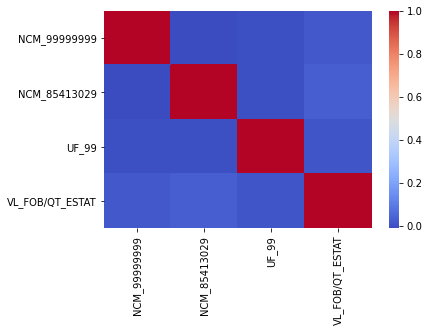

In [102]:
sns.heatmap(df2.corr(),cmap="coolwarm", annot=False )

# Dividindo o dataset em "base de teste" e "base de treinamento"

In [103]:
df2.columns

Index(['NCM_99999999', 'NCM_85413029', 'UF_99', 'VL_FOB/QT_ESTAT'], dtype='object')

In [104]:
x = df2[['NCM_99999999', 'NCM_85413029', 'UF_99']]
y = df2['VL_FOB/QT_ESTAT']

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=16)

# Treinando o modelo LinearRegression

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
lm = LinearRegression()

In [109]:
lm.fit(x_train,y_train)

LinearRegression()

In [110]:
# impressão do intercepto
print(lm.intercept_)

-34.26483180728451


In [111]:
# impressão dos coeficientes
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coeficiente'])
coeff_df

,Coeficiente
NCM_99999999,19085.368619
NCM_85413029,80999.483592
UF_99,11920.198435


In [112]:
# realizando as predições
predicoesLR = lm.predict(x_test)

# Treinando o modelo Random Forest Regressor

In [113]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [114]:
predicoesRFR = rfr.predict(x_test)

# Treinando o modelo Gradient Boosting Regressor

In [115]:
from sklearn.ensemble import GradientBoostingRegressor

In [116]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [117]:
predicoesGBR = gbr.predict(x_test)

# Avaliando os modelos

#### Root mean squared error - RMSE

In [118]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [119]:
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

In [120]:
RMSE_LR = rmse(y_test,predicoesLR)
RMSE_LR

260849.57589358158

In [121]:
RMSE_RFR = rmse(y_test,predicoesRFR)
RMSE_RFR

261644.89355781642

In [122]:
RMSE_GBR = rmse(y_test,predicoesGBR)
RMSE_GBR

261740.39656095533

#### Mean absolute error - MAE

In [123]:
from sklearn.metrics import mean_absolute_error

In [124]:
MAE_LR=mean_absolute_error(y_test, predicoesLR)
MAE_LR

3957.8116032498783

In [125]:
MAE_RFR=mean_absolute_error(y_test, predicoesRFR)
MAE_RFR

3694.2385980025124

In [126]:
MAE_GBR=mean_absolute_error(y_test, predicoesGBR)
MAE_GBR

3688.464254300966

#### Mean squared error - MSE

In [127]:
from sklearn.metrics import mean_absolute_error

In [128]:
MSE_LR=mean_squared_error(y_test, predicoesLR)
MSE_LR

68042501243.861374

In [129]:
MSE_RFR=mean_squared_error(y_test, predicoesRFR)
MSE_RFR

68458050324.88109

In [130]:
MSE_GBR=mean_squared_error(y_test, predicoesGBR)
MSE_GBR

68508035191.88616

#### Coeficente de determinação - R²

In [131]:
from sklearn.metrics import r2_score

In [132]:
R2_LR=r2_score(y_test, predicoesLR)
R2_LR

0.0029120292620761212

In [133]:
R2_RFR=r2_score(y_test, predicoesRFR)
R2_RFR

-0.003177385182742576

In [134]:
R2_GBR=r2_score(y_test, predicoesGBR)
R2_GBR

-0.003909858397256993